In [1]:
from sqlalchemy import create_engine
import psycopg2
import pandas as pd

In [2]:
engine = create_engine('postgresql://localhost:5432/sql-challenge')

In [3]:
connection = psycopg2.connect(user = "postgres",
        password = "postgres",
        host = "localhost",
        port = "5432",
        database = "sql-challenge")

In [4]:
query = "SELECT * FROM salaries"

In [5]:
salaries = pd.read_sql_query(query, connection)
salaries

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


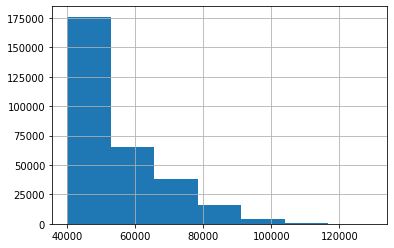

In [6]:
hist = salaries['salary'].hist(bins = 7)

In [7]:
query = "SELECT * FROM titles"
titles = pd.read_sql_query(query, connection)
titles

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [8]:
query = "SELECT * FROM employees"
emp = pd.read_sql_query(query, connection)
emp

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991
...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994


In [21]:
#query = "SELECT employees.emp_no,employees.emp_title_id,titles.title,salaries.salary FROM employees,titles,salaries"
query = "SELECT titles.title,AVG(salaries.salary) FROM employees INNER JOIN titles ON titles.title_id = emp_title_id INNER JOIN salaries ON salaries.emp_no = employees.emp_no GROUP BY titles.title"
total_db = pd.read_sql_query(query, connection)
total_db

,title,avg
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


In [30]:
x = total_db.set_index('title')

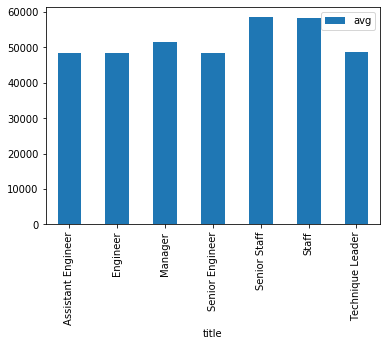

In [31]:
x.plot.bar()